In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

winemag-data-130k-v2.csv



In [2]:
init_data = pd.read_csv("../input/winemag-data-130k-v2.csv")
print("Length of dataframe before duplicates are removed:", len(init_data))
init_data.head()

Length of dataframe before duplicates are removed: 129971


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# Drop duplicates
parsed_data = init_data[init_data.duplicated('description', keep=False)]
print("Length of dataframe after duplicates are removed:", len(parsed_data))

parsed_data.dropna(subset=['description', 'points'])
print("Length of dataframe after NaNs are removed:", len(parsed_data))

parsed_data.head()

Length of dataframe after duplicates are removed: 20026
Length of dataframe after NaNs are removed: 20026


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
11,11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte


In [4]:
dp = parsed_data[['description','points']]
dp.info()
dp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20026 entries, 9 to 129913
Data columns (total 2 columns):
description    20026 non-null object
points         20026 non-null int64
dtypes: int64(1), object(1)
memory usage: 469.4+ KB


,description,points
9,This has great depth of flavor with its fresh ...,87
10,"Soft, supple plum envelopes an oaky structure ...",87
11,"This is a dry wine, very spicy, with a tight, ...",87
12,"Slightly reduced, this wine offers a chalky, t...",87
13,This is dominated by oak and oak-driven aromas...,87


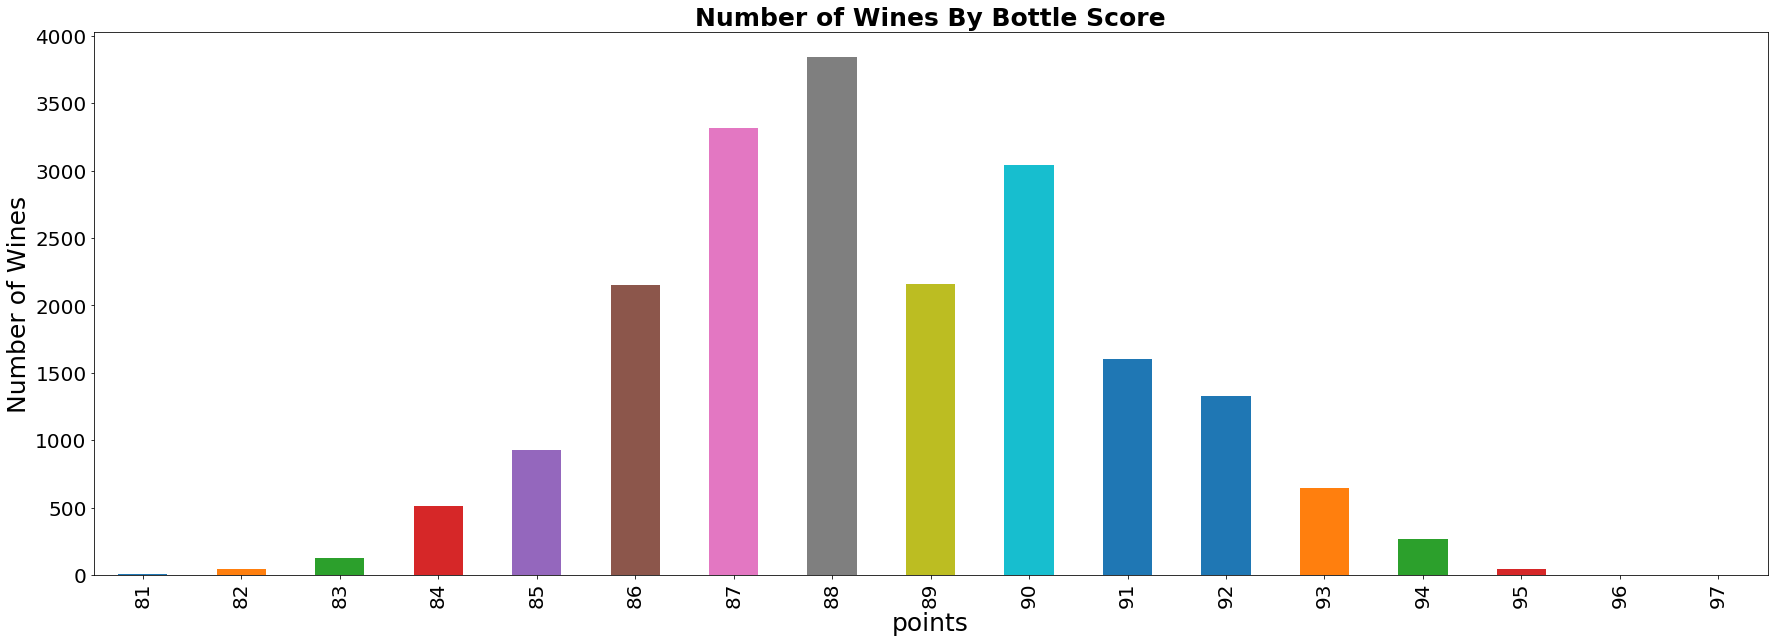

In [17]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of Wines By Bottle Score', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of Wines', fontsize = 25) # Y label
ax.set_xlabel('Bottle Score', fontsize = 25) # X label
dp.groupby(['points']).count()['description'].plot(ax=ax, kind='bar')

In [6]:
dp = dp.assign(description_length = dp['description'].apply(len))
dp.info()
dp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20026 entries, 9 to 129913
Data columns (total 3 columns):
description           20026 non-null object
points                20026 non-null int64
description_length    20026 non-null int64
dtypes: int64(2), object(1)
memory usage: 625.8+ KB


,description,points,description_length
9,This has great depth of flavor with its fresh ...,87,160
10,"Soft, supple plum envelopes an oaky structure ...",87,243
11,"This is a dry wine, very spicy, with a tight, ...",87,179
12,"Slightly reduced, this wine offers a chalky, t...",87,171
13,This is dominated by oak and oak-driven aromas...,87,234


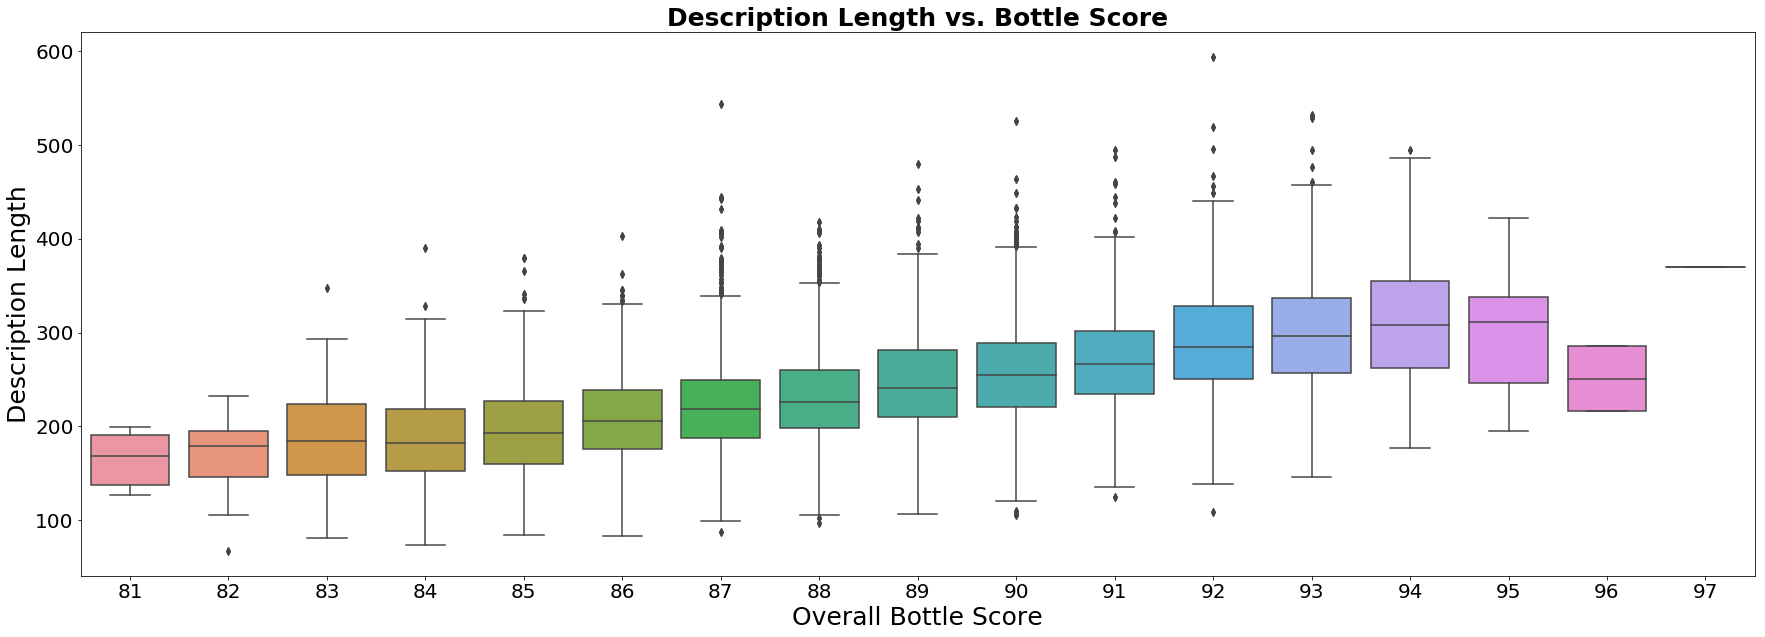

In [13]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='description_length', data=dp)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length vs. Bottle Score', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Overall Bottle Score', fontsize = 25) # X label
plt.show()

#fig, ax = plt.subplots(figsize=(30,10))
#sns.boxplot(x='description_length', y='points', data=dp)
#plt.xticks(fontsize=20) # X Ticks
#plt.yticks(fontsize=20) # Y Ticks
#ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
#ax.set_ylabel('Points', fontsize = 25) # Y label
#ax.set_xlabel('Description Length', fontsize = 25) # X label
#plt.show()

In [8]:
#Transform method taking points as param
def transform_points_simplified(points):
    if points >= 84 and points < 88:
        return 2 
    elif points >= 88 and points < 92:
        return 3 
    elif points >= 92 and points < 96:
        return 4 

#Applying transform method and assigning result to new column "points_simplified"
dp = dp.assign(points_simplified = dp['points'].apply(transform_points_simplified))
dp.head()

,description,points,description_length,points_simplified
9,This has great depth of flavor with its fresh ...,87,160,2.0
10,"Soft, supple plum envelopes an oaky structure ...",87,243,2.0
11,"This is a dry wine, very spicy, with a tight, ...",87,179,2.0
12,"Slightly reduced, this wine offers a chalky, t...",87,171,2.0
13,This is dominated by oak and oak-driven aromas...,87,234,2.0


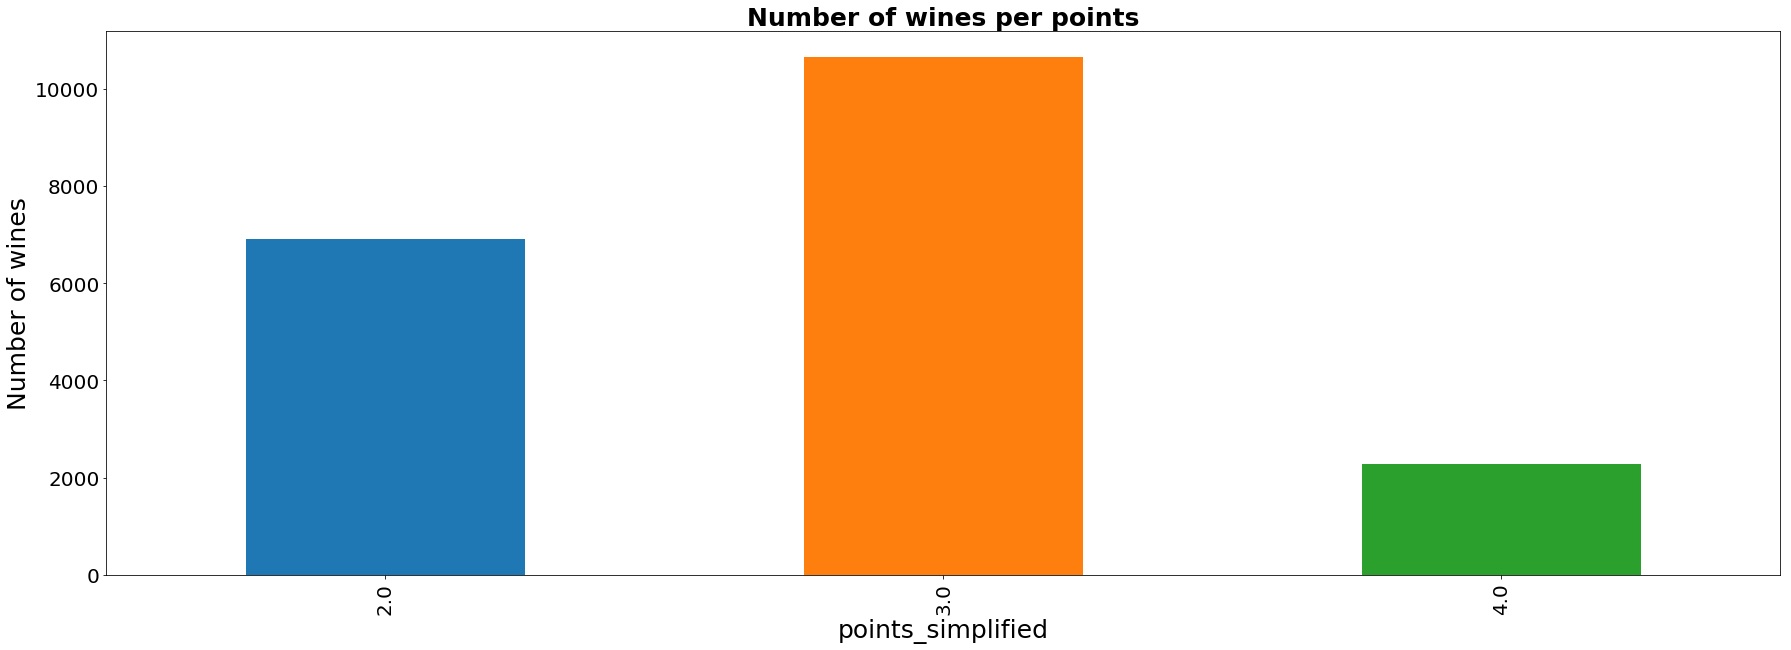

In [18]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
dp.groupby(['points_simplified']).count()['description'].plot(ax=ax, kind='bar')